## iris 데이터 학습시키기
이전에는 `seaborn` 모듈에서 제공하는 `iris` 데이터셋을 불러와서 분석을 했었다.

이번에는 `sklearn` 모듈의 `load_iris`를 통해 데이터셋을 불러온다.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

먼저, `sklearn.datasets`의 `load_iris`를 임포트한다.

In [2]:
from sklearn.datasets import load_iris
dataset = load_iris()

불러온 학습셋과 정답셋을 각각 `DataFrame`으로 만든 후, `concat`으로 합쳐본다.

In [3]:
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
target = pd.DataFrame(dataset.target, columns=['target_'])
iris = pd.concat([data, target], axis=1)

학습 시 필요한 데이터는 숫자 데이터, 그 중에서도 정수형이기 때문에 아래와 같이 데이터의 타입을 `int` 타입으로 바꿔준다.

In [4]:
iris.target_ = iris.target_.astype('int')

데이터의 정보를 확인해본다.

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target_              150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


`corr`를 통해 상관관계를 확인해보면 아래와 같다.

In [6]:
iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target_,0.782561,-0.426658,0.949035,0.956547,1.000000


`pairplot`으로 시각화도 해본다.

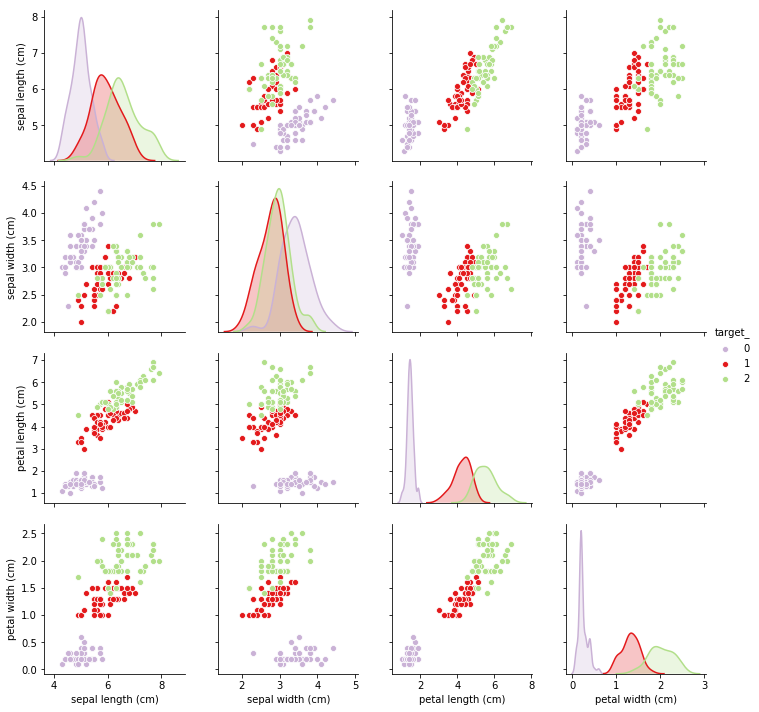

In [7]:
sns.pairplot(iris, vars=iris.columns[:-1], palette='Paired_r', hue='target_')

상관관계에 대한 `heatmap` 역시 그릴 수 있다.

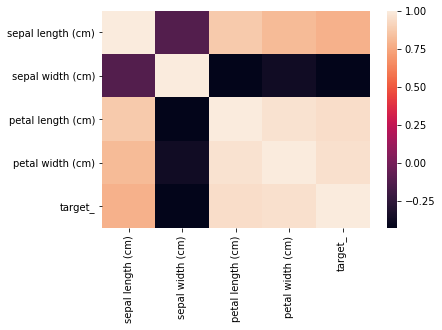

In [8]:
sns.heatmap(iris.corr())

## Scikit-Learn
그동한 데이터를 분석했던 것을 토대로 기계학습을 시도해본다. `scikit-learn`을 처음으로 맛보기를 해보고자 한다.

먼저, `neighbors` 알고리즘 중 그 유명한 `KNN` 모델을 사용해 데이터를 분류해본다. 아래와 같이 코드를 작성한다.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

`scikit-learn`은 추상화가 잘되어있는 모듈이다.

모델을 사용하는 모든 방법들은 하나의 방법으로 귀결되는데, 먼저 모듈을 인스턴스화한 후 `fit` 메소드를 통해 데이터를 학습시킨 후 `predict` 메소드로 예측을 시도한다.

In [10]:
knn.fit(iris.iloc[:, :-1], iris.iloc[:, -1])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

`fit`를 하면 학습이 완료된 모델을 반환한다.

학습이 완료된 모델에 적용된 여러 파라미터들은 `하이퍼 파라미터(Hyper-Parameter)`라고 한다.

하이퍼 파라미터에 대한 자세한 설명은 뒷장에서 다루고자 한다.

In [11]:
knn.predict([[3, 3, 3, 3]])

array([1])

위의 `predict` 메소드를 통해 나온 예측 결과는 `target`의 인덱스 번호에 해당한다.

In [12]:
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

즉, 학습시킨 모델에 `3, 3, 3, 3` 이라는 데이터를 예측시켰을 때 `versicolor`로 예측했다는 의미이다.

마찬가지로 `결정 트리(Decision Tree)` 모델을 사용하여 분류를 해본다.

사용 방법은 위와 동일하게 먼저 모델을 인스턴스화 시킨 후 `fit` 한 다음 `predict`로 예측을 시도한다.

In [13]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(iris.iloc[:, :-1], iris.iloc[:, -1])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
tree.predict([[3, 3, 3, 3]])

array([1])